3.13  For a large uniformly illuminated rectangular aperture antenna find,

(a) Directivity

$$ D=\frac{4\pi}{\lambda^2}A_p $$

In [28]:
import numpy as np

f = 2.4e9
lam = 3e8/f
Ap = 0.5*0.5
D = 4*np.pi*Ap/lam**2
print("Directivity: ", D)
print("DdB: ", 10*np.log10(D))

Directivity:  201.06192982974676
DdB:  23.03329846678021


(b) Aperture efficiency (the ratio of the antenna directivity and the standard directivity equation 1.10)

$$ \eta_{eff}=\frac{D}{D_{std}} $$

Since the antenna is a large uniform rectangular antenna $D=D_{std}$ giving $\eta_{eff}=100\%$

(c) radiation pattern

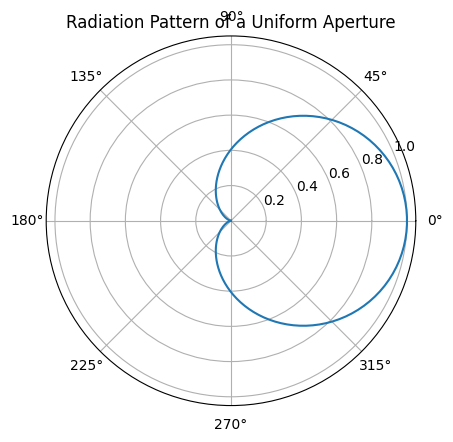

In [29]:
import matplotlib.pyplot as plt

theta = np.linspace(-1*np.pi, np.pi, 150)
E = np.sinc(theta/np.pi)**2
plt.polar(theta, E)
plt.title('Radiation Pattern of a Uniform Aperture')
plt.show()

3.14
(a) What is the radiation pattern for a dominant mode horn antenna

$$ \phi=0, 180 $$         
$$ E_\phi~cos\theta \frac{cos(k_x a/2)}{\pi^2 - (k_x a)^2} $$
$$ \phi=90, 270 $$        
$$ E_\phi~\frac{sin(k_y b/2)}{k_y b/2} $$

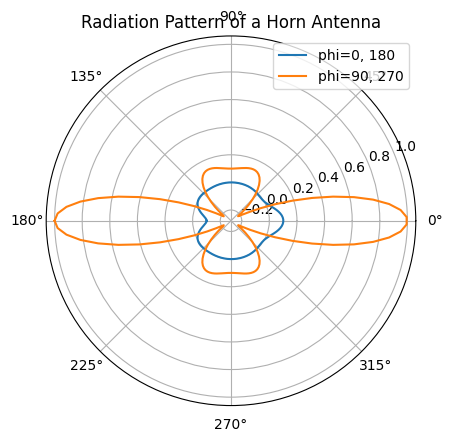

In [30]:
lam = 3e8/2.4e9
k = 2*np.pi / lam
phi = [0, 90]
kx = k*np.sin(theta)*np.cos(phi[0])
ky = k*np.sin(theta)*np.sin(phi[1])
a = 3*lam
b = 2*lam
theta = np.linspace(-1*np.pi, np.pi, 150)
E_phi_1 = np.cos(theta)*np.cos(kx*a/2) / (np.pi**2 - (kx*a)**2)
E_phi_2 = np.sin(ky*a/2) / (ky*a/2)

plt.polar(theta,E_phi_1,label='phi=0, 180')
plt.polar(theta,E_phi_2,label='phi=90, 270')
plt.legend()
plt.title('Radiation Pattern of a Horn Antenna')
plt.show()

(b) Plot the directivity as a function of frequency. In the same plot show the gain foor 100% efficiency $(4\pi ab/\lambda^2)$.

Directivity is given as:

$$ D = \frac{8}{\pi^2}\frac{4*\pi}{\lambda^2}ab $$

And gain is:

$$ G=\eta D $$

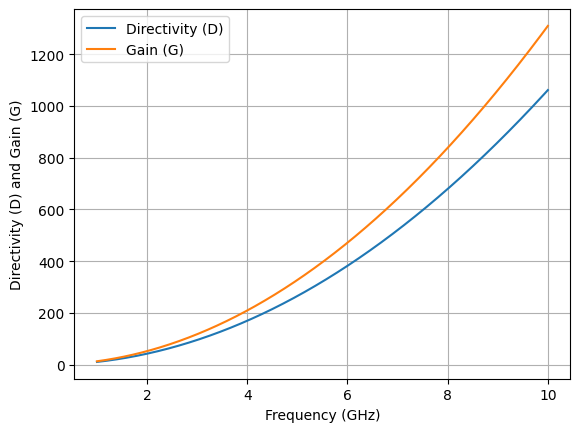

In [31]:
f = np.linspace(1e9, 10e9, 1000)
lam = 3e8/f
D = a*b*8*4*np.pi / (lam**2*np.pi**2)
G = 4*np.pi*a*b / (lam**2)
plt.plot(f/1e9, D, label='Directivity (D)')
plt.plot(f/1e9, G, label='Gain (G)')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Directivity (D) and Gain (G)')
plt.grid()
plt.show()


3.15 For uniformly illuminated circular aperture antenna

(a) Radiation pattern

To get the radiation pattern of a circular aperture antenna the jinc function is used which uses the 

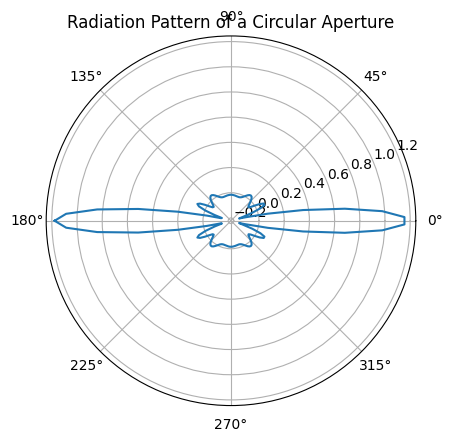

In [32]:
# use the jinc function
from scipy.special import j1

# bessel function of the first kind
J = j1(k*a*np.sin(theta))

# electric field
E = 2*np.pi*a*J/(k*a*np.sin(theta))

plt.polar(theta, E)
plt.title('Radiation Pattern of a Circular Aperture')
plt.show()

(b) Directivity

$$ D = \frac{4\pi}{\lambda^2}A_p $$

Where $A_p=\pi a^2$

In [33]:
f = 2.4e9
lam = 3e8/f
Ap_circle = np.pi*a**2
D_circle = 4*np.pi*Ap_circle/lam**2

print("Directivity: ", D_circle)
print("DdB: ", 10*np.log10(D_circle))

Directivity:  355.3057584392169
DdB:  25.506022461555553


(c) Effective area, which is given by

$$ A_{eff} = A_p * \eta_{eff} $$

where $\eta_{eff}$ is the radiation efficiency

In [37]:
Ap_std = a**2
D_std = 4*np.pi*Ap_std/lam**2
print("Standard directivity: ", D_std)
eta = D_circle/D_std
print("Efficiency: ", eta)

Standard directivity:  113.09733552923255
Efficiency:  3.141592653589793


(d) Aperture efficiency

(e) approximation for the null-to-null beamwidth 

$$ \int_0^a J_0 (bx)xdx=\frac{a}{b}J_1 (ab) $$